In [1]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm



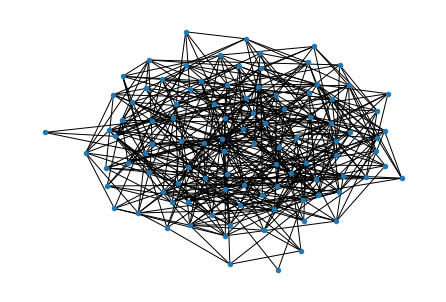

In [38]:

n = 100

G = nx.erdos_renyi_graph(n, 0.1)
initial_nodes = list(G.nodes())

#G.add_node(22)
nx.draw_kamada_kawai(G, with_labels = False, node_size = 20)


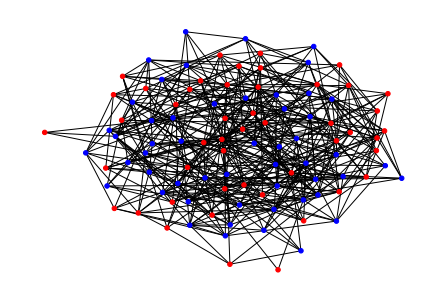

In [43]:

SES_list = np.random.choice(['High', 'Low'], n, p=[0.5,0.5])
nodes = [i for i in range(n)]
SES_dict = {node: {'SES': SES_list[node]} for node in nodes}


nx.set_node_attributes(G, SES_dict)


colormap = ['blue' if SES == 'High' else 'red' for SES in SES_list]
nx.draw_kamada_kawai(G, node_color = colormap, node_size = 20)



In [50]:

G.add_nodes_from([('A', {'SES': 'High'})])

G.nodes['A']


ValueError: not enough values to unpack (expected 2, got 1)